In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [ ]:
def separe_en_caracteres_local(image_binary : np, indices_debut_fin_ligne : tuple, taux=0.05) -> list :

    """
    Description : Prends en entrée une ligne de texte dans une image et renvoie les indice de colonnes de début et de fin de chaque caractère
                  
                  Le but est d'obtenir le taux de pixel noirs de chaque colonne. 
                  On crée un dictionnaire stockant le nombre de pixels noirs par colonne (en parcourant l'image).
                  On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne.

                  On conserve seulement ceux qui sont supérieus à un certain taux et on les garde dans ue liste.
                  Nous avons donc une liste de plusieurs plages continues de données mais les plages ne sont pas continues entre elles.
                  On va donc récupérer les indices de début et de fin de chaque plage de données continues.
                  Ce qui représente les indices de début et de fin de chaque caractères de la ligne.

    Exemple : >>> ranges = separe_en_lignes(image)
                  ranges = [ (0, 21), (25, 65), ...]

    Inputs : - image_binary (np) : la verion binarisée de l'image dont on veut extraire les carctères
             - indices_debut_fin_ligne (tuple) : les indices de début et de fin de la ligne dont on veut extraire les caractères
             - taux (float) : fixé de base à 0.05, permet de spérarer les colonnes de pixel contenant de l'information ou non

    Output : (ranges) list : une liste de tuples des indices de colonnes de début et de fin de chaque caractère pour la ligne entrée
    """
   
    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])) :
        dictionnaire[k] = 0

    for i in range(len(h)) :
        for j in range(len(h[i])) :
            if h[i][j] == 0 :
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys() :
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.05
    indices = []
    for elt in dictionnaire.keys() :
        if dictionnaire[elt] >= taux :
            indices.append(elt)

    # Obtenir des plages continues de pixels représentant les caractères en rajoutant un peu d'espace entre les caractères pour ne pas qu'ils soient sérrés dans leurs cases
    d = np.diff(indices)
    espaces =[int(val/2) for val in d if val > 1]
    
    ranges = []
    start = indices[0]
    indices_espaces = 0
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            if indices_espaces >= 1 :
                val_avant = espaces[indices_espaces-1] 
            else :
                val_avant = espaces[indices_espaces]
            val_apres = espaces[indices_espaces]
            ranges.append((start-val_avant, indices[i - 1]+val_apres))
            start = indices[i]
            indices_espaces += 1
    ranges.append((start-val_avant, indices[-1]+val_avant))

    return ranges

In [3]:
image = cv2.imread('scan1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

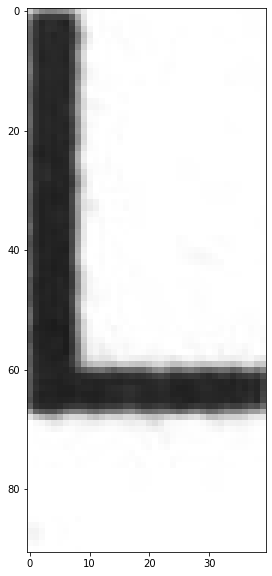

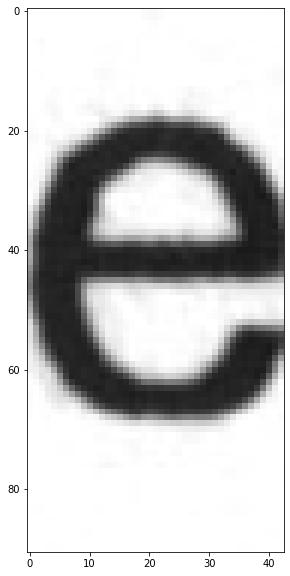

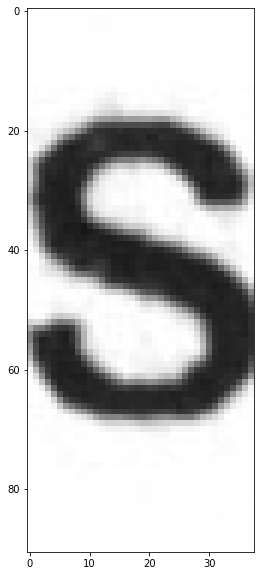

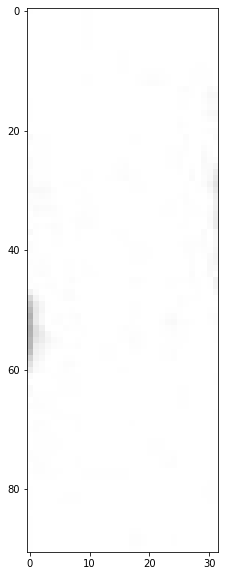

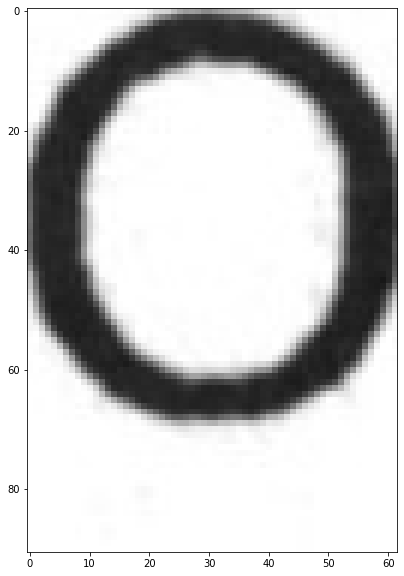

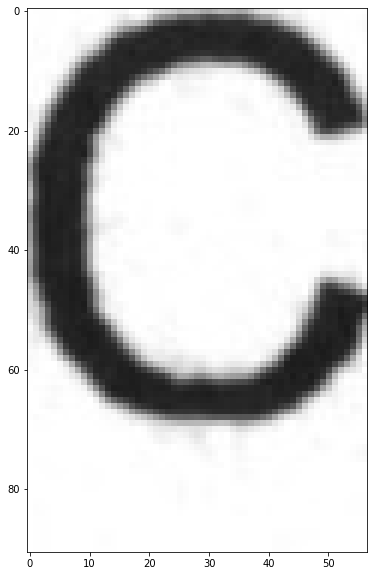

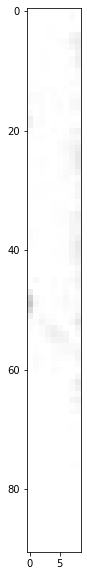

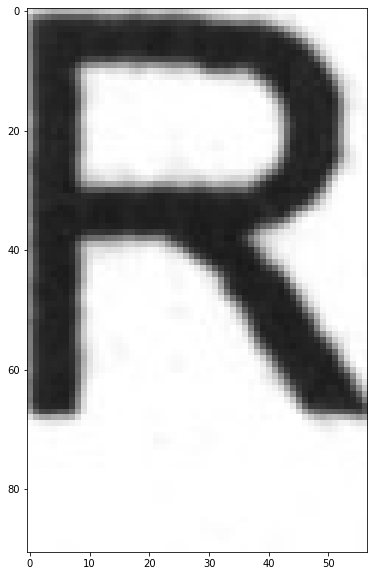

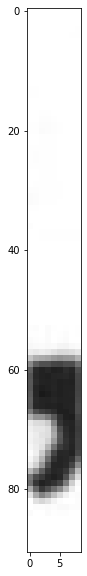

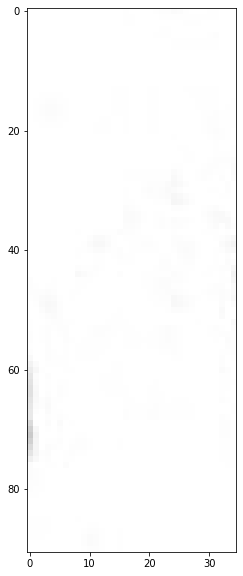

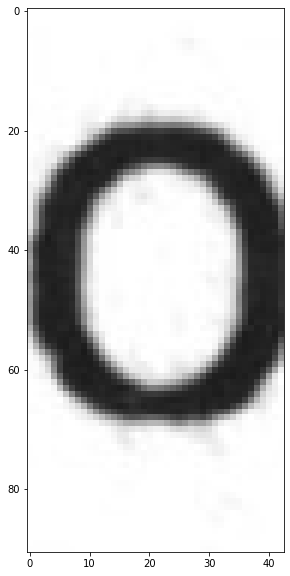

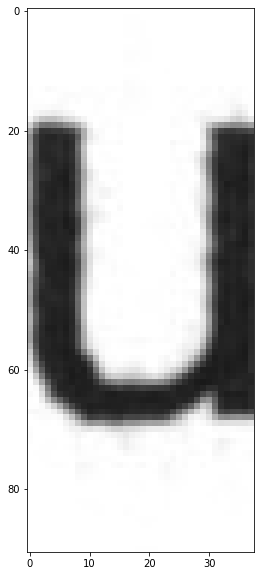

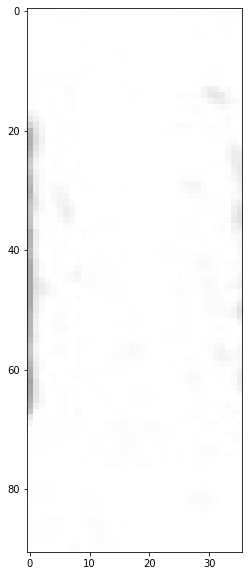

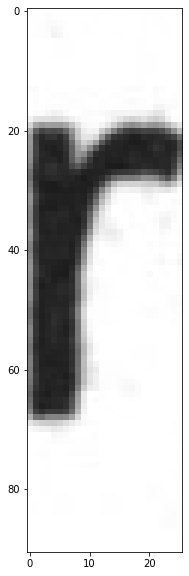

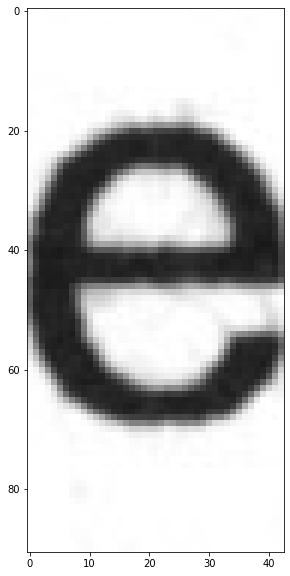

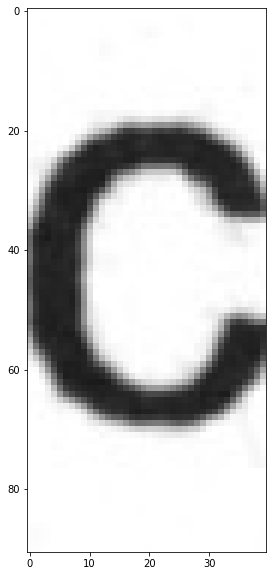

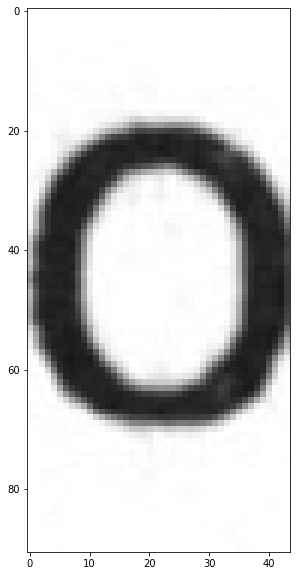

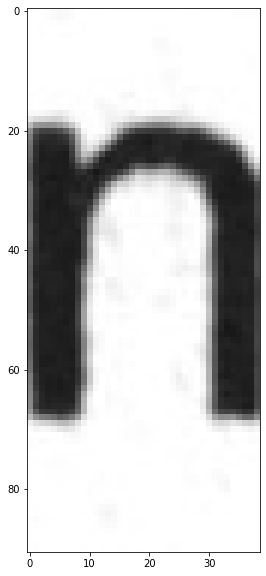

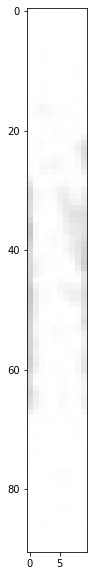

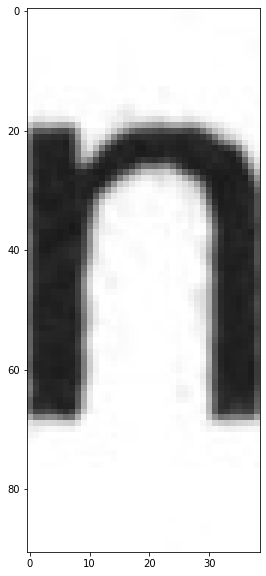

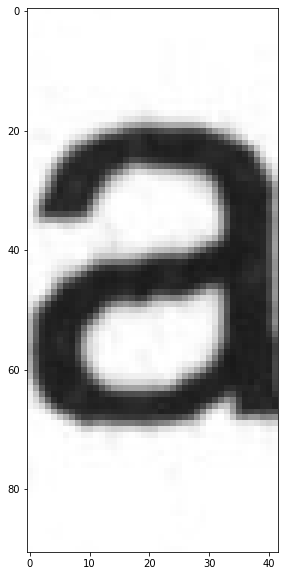

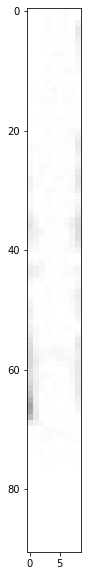

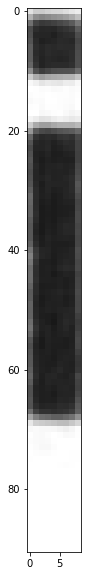

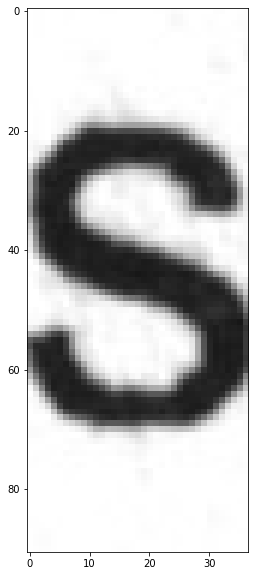

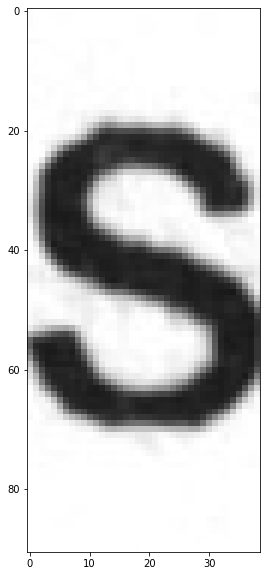

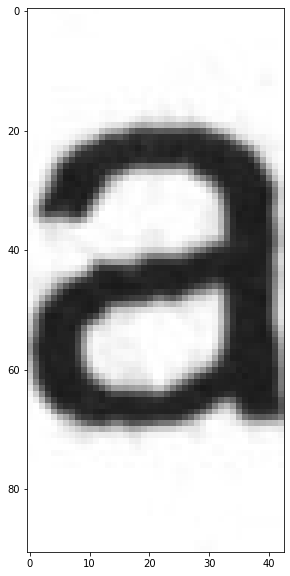

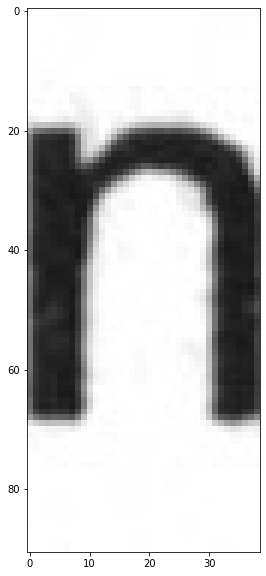

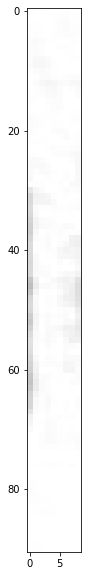

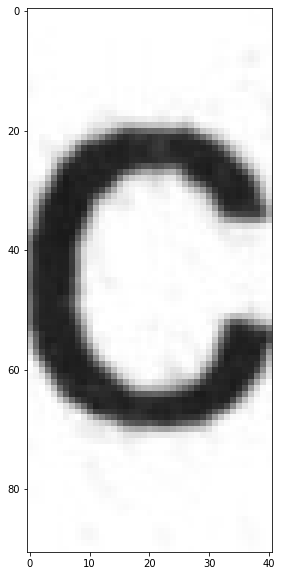

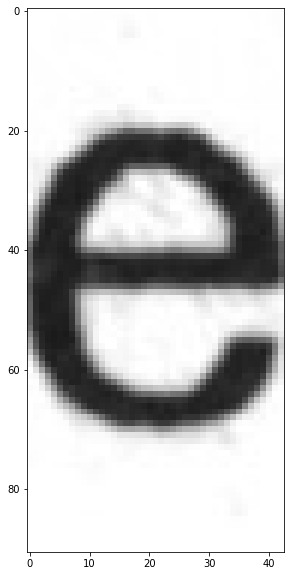

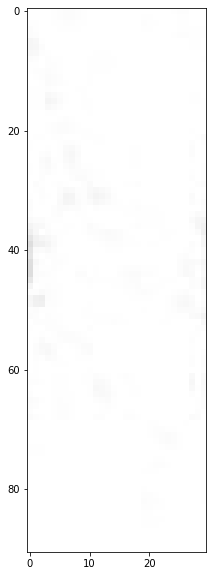

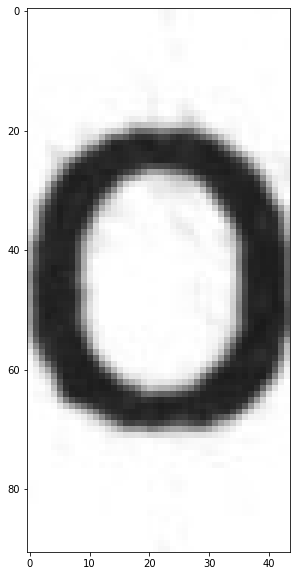

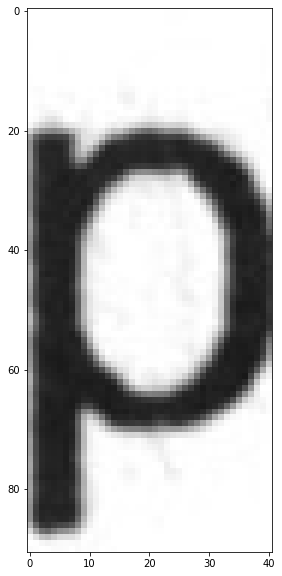

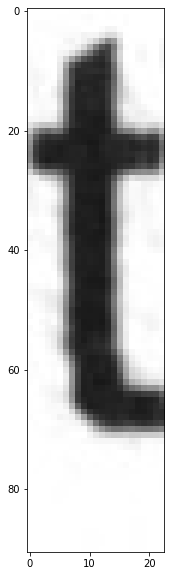

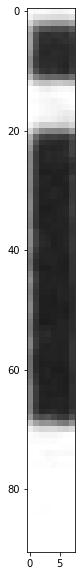

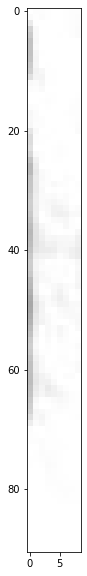

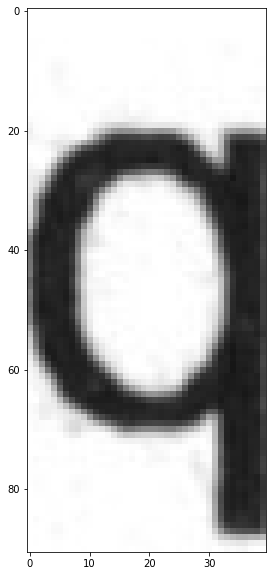

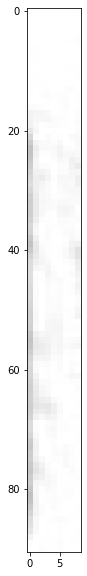

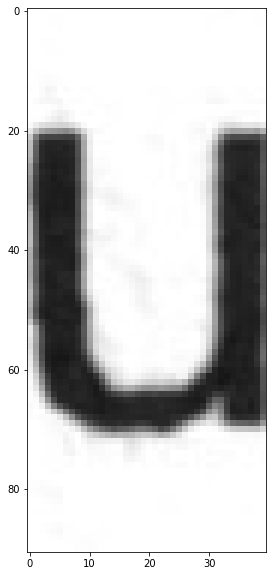

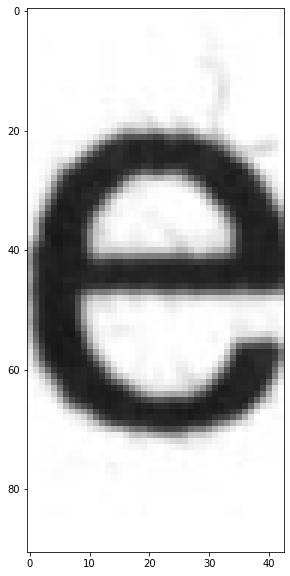

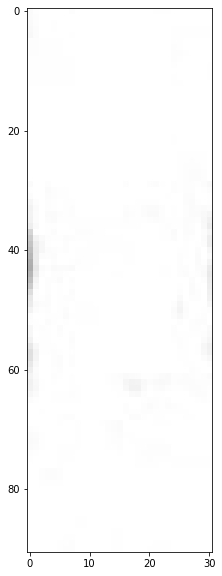

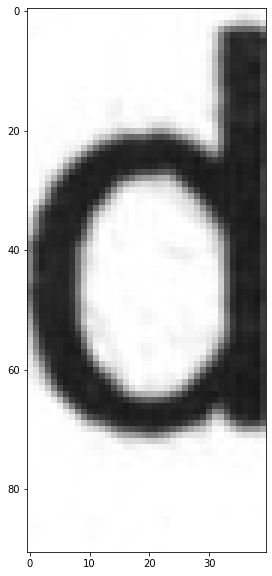

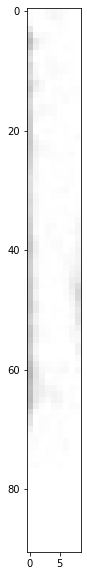

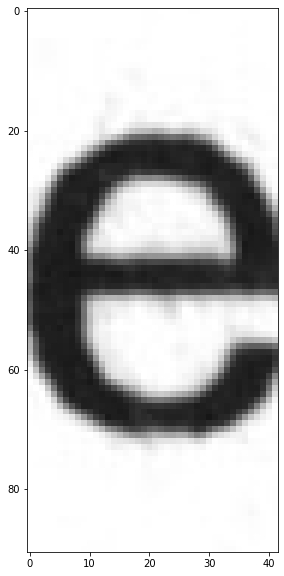

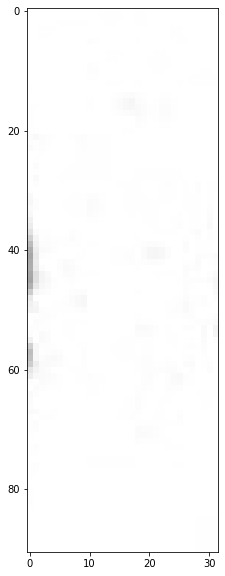

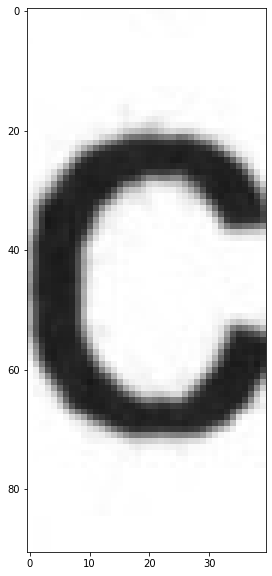

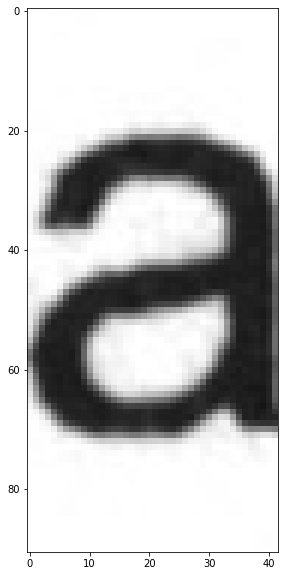

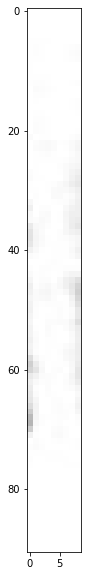

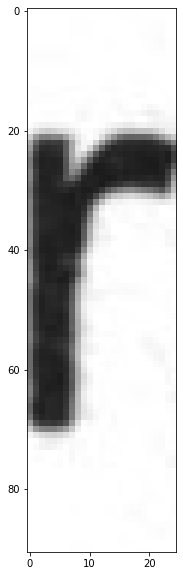

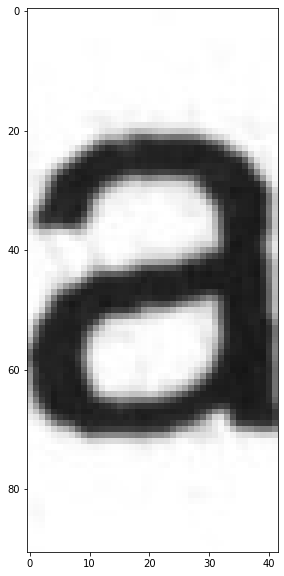

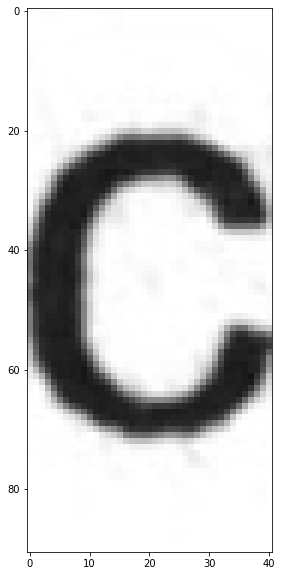

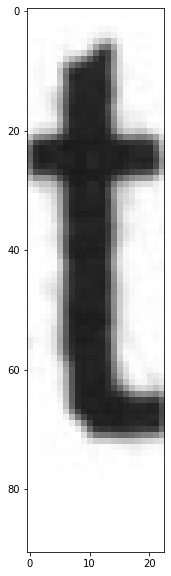

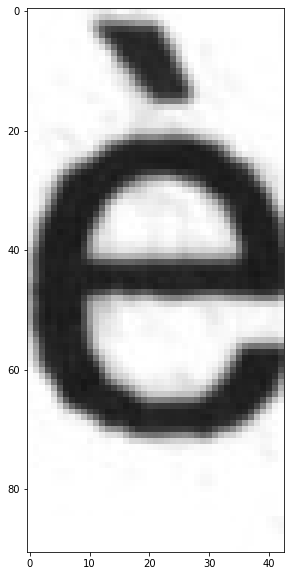

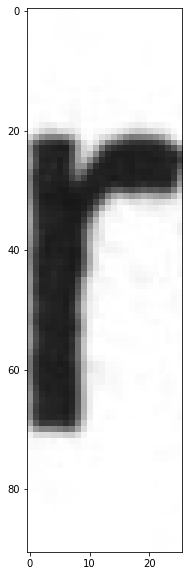

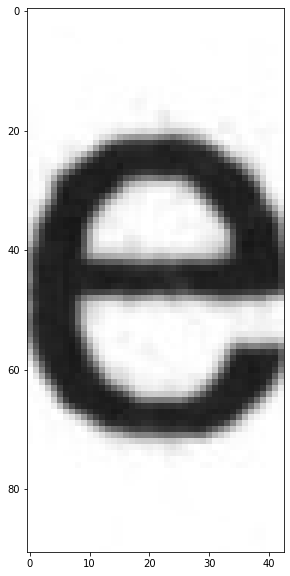

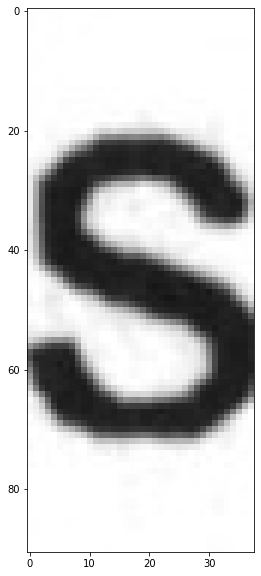

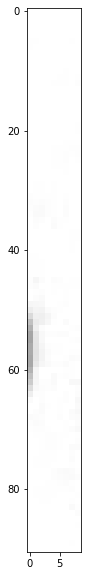

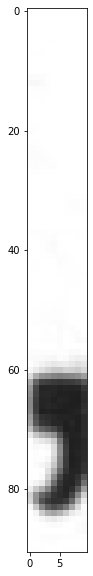

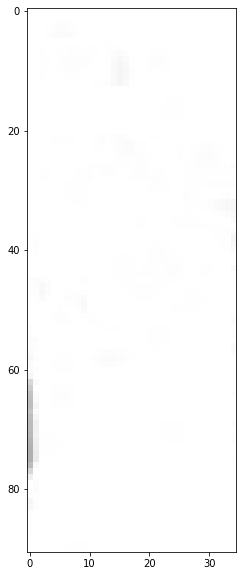

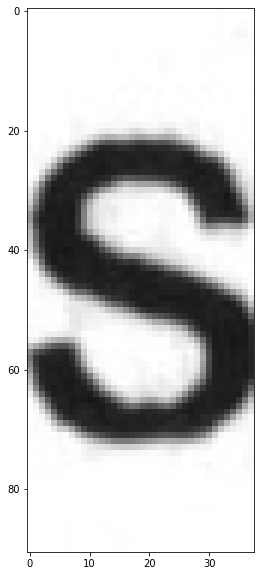

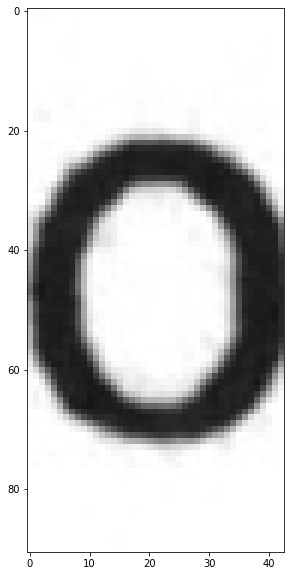

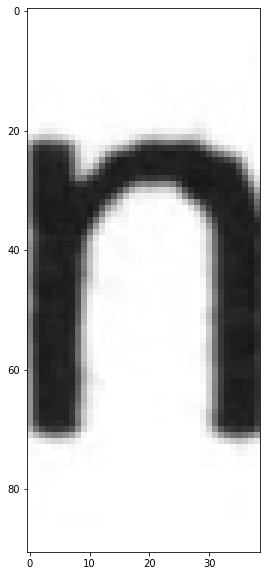

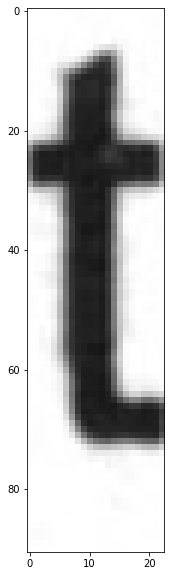

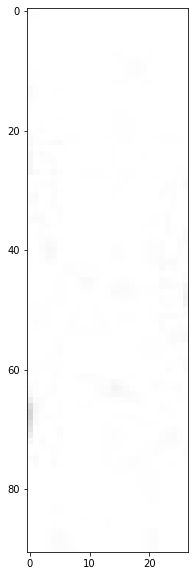

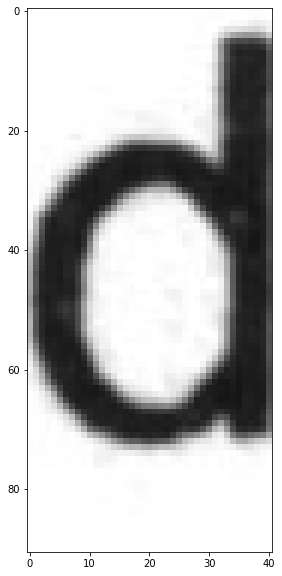

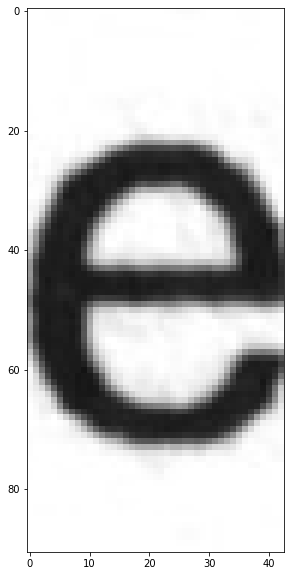

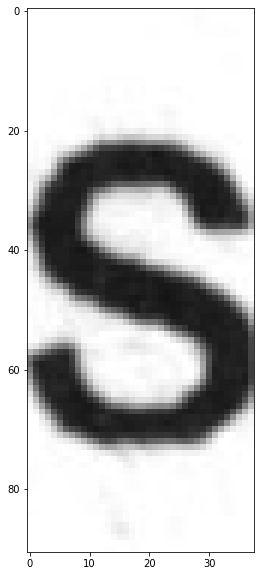

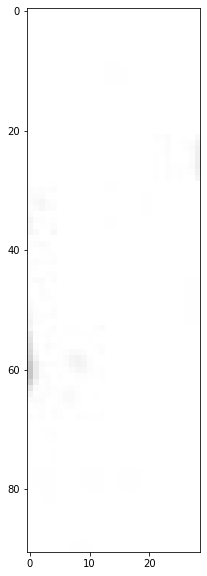

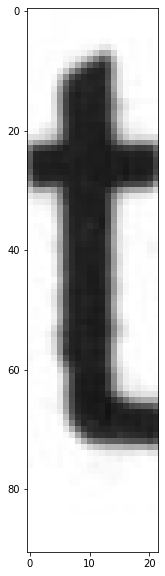

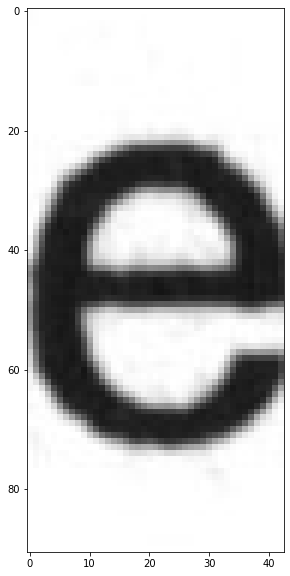

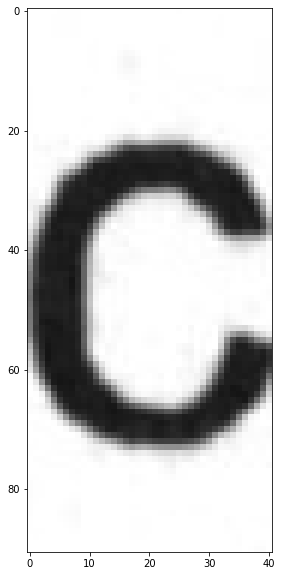

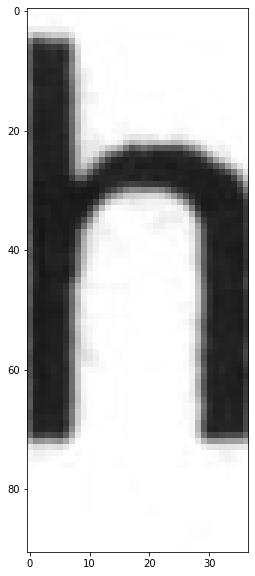

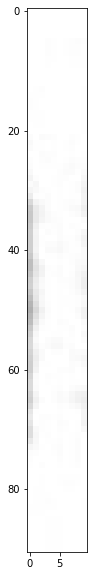

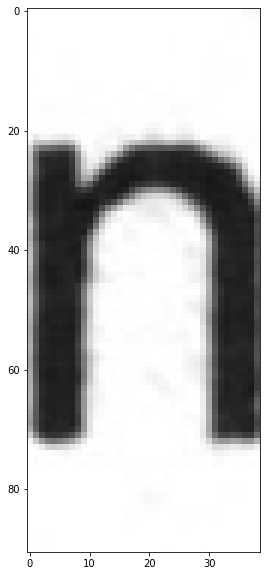

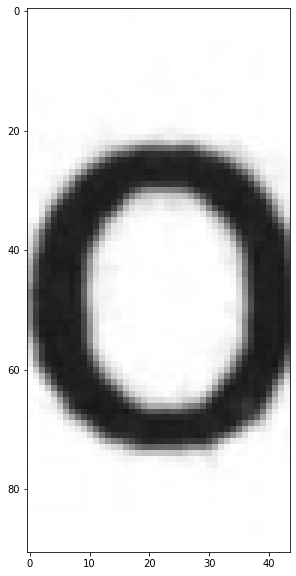

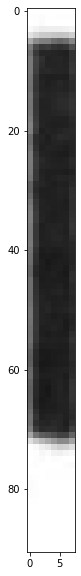

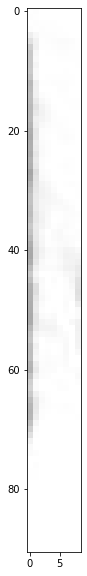

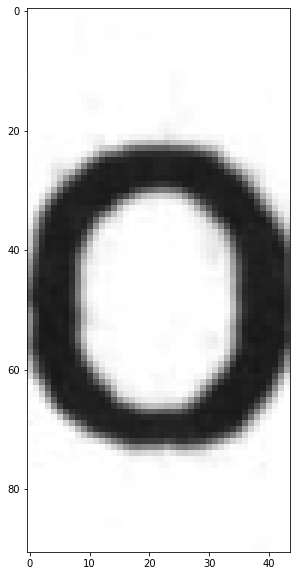

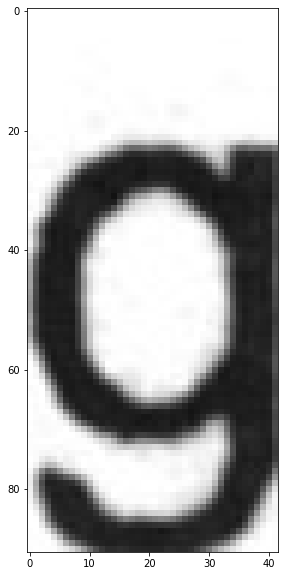

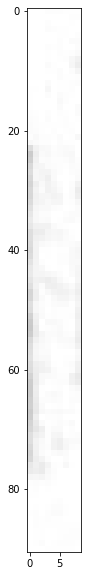

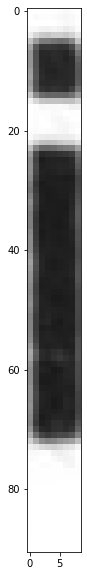

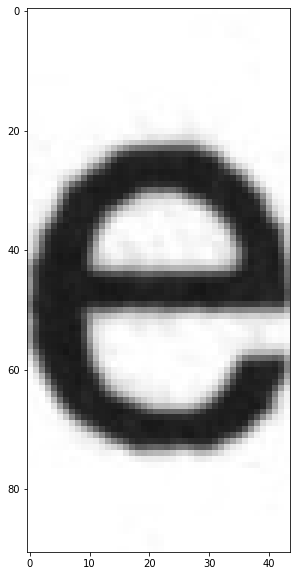

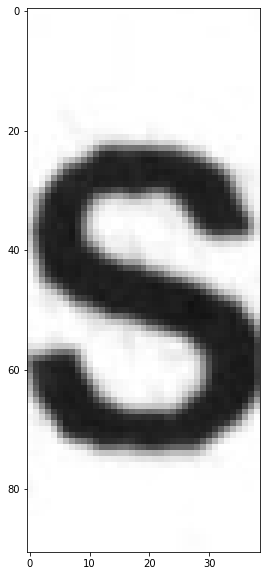

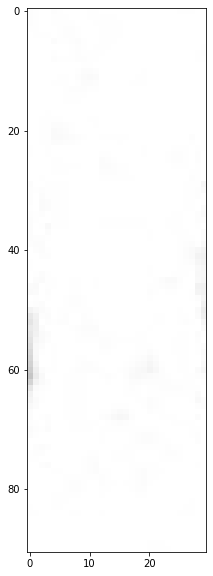

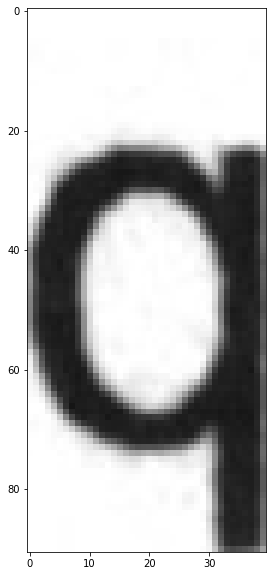

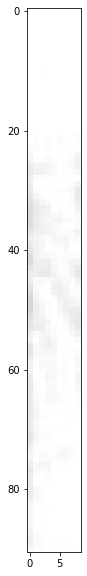

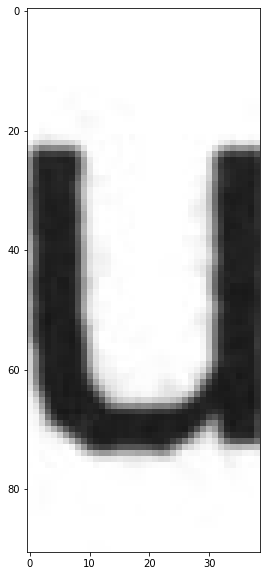

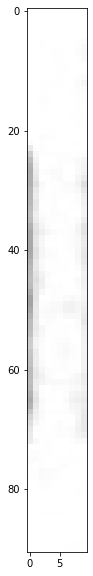

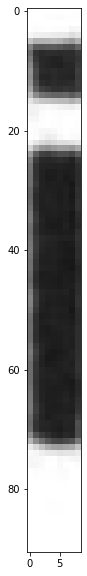

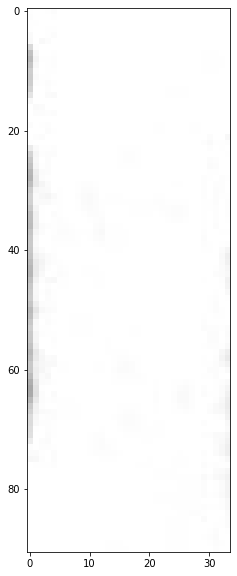

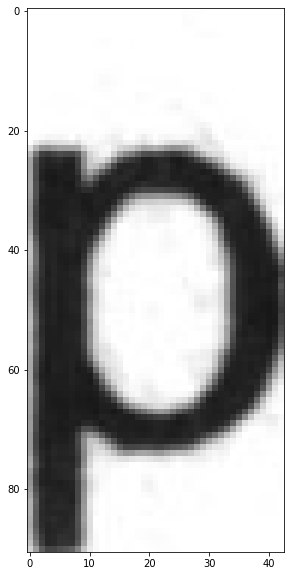

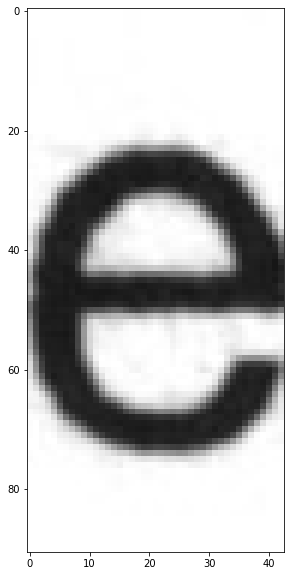

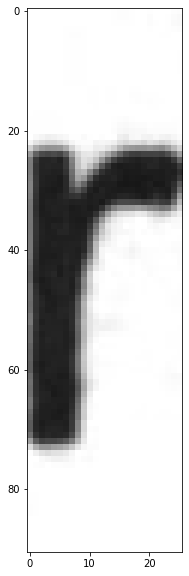

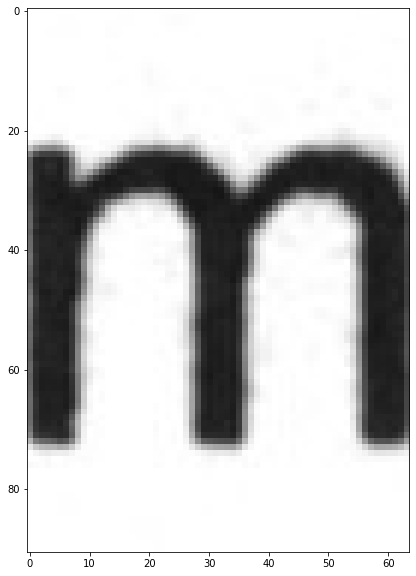

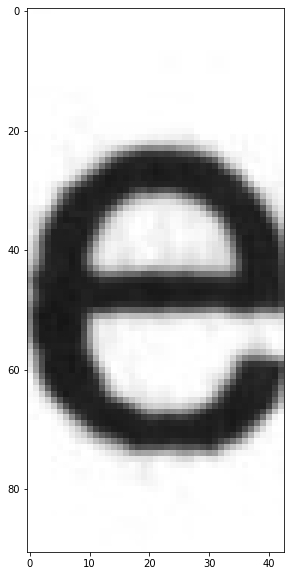

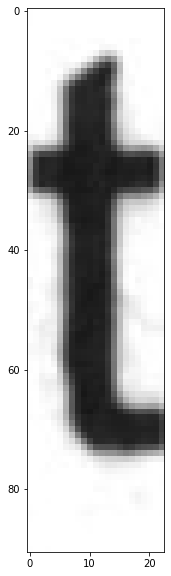

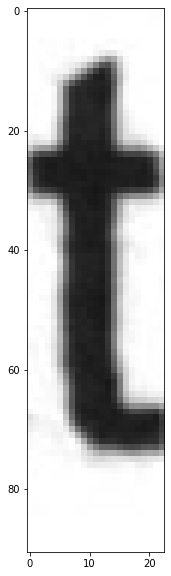

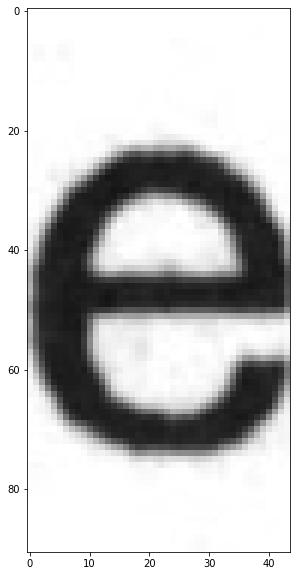

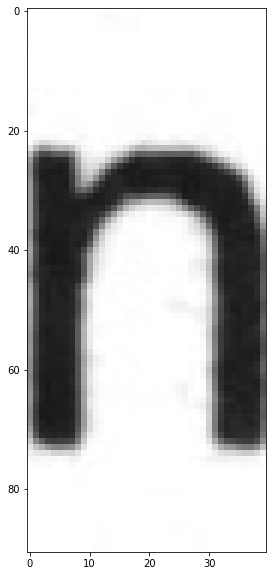

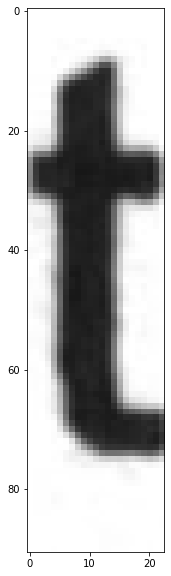

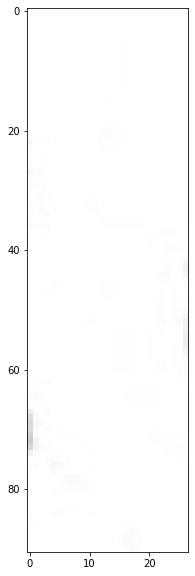

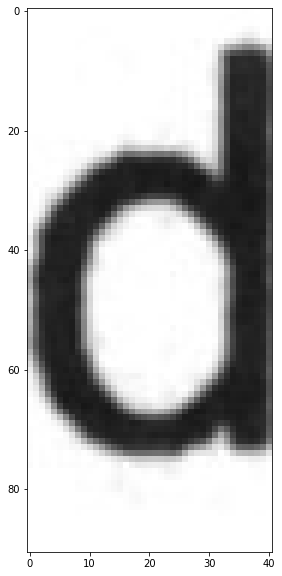

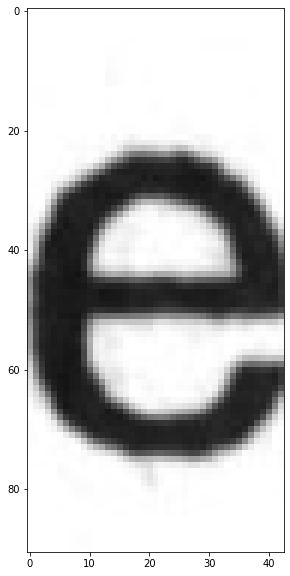

In [4]:
indices_debut_fin_ligne = indices_lignes[0]

ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

for elt in ranges :
    plt.figure(figsize=(20,10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
    plt.show()

In [ ]:
alphabet = []
alphabet.append(['a', 'b', 'c', 'd', 'e', 'fg', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
alphabet.append(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
alphabet.append(list('0123456789'))
alphabet.append(list(',.;?!&+-_èéäàëâê/\()[]{}#=*$%‘@°'))

for j in range(0,4) :
    print(alphabet[j])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

# Liste des lettres de l'alphabet
alphabet = []
alphabet.append(["majuscule", list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')])
alphabet.append(["minuscule", ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']])
alphabet.append(["chiffres", list('0123456789')])
'''
#alphabet.append(list(',.;?!&+-_èéäàëâê/\()[]{}#=*$%‘@°'))
alphabet.append(["speciaux", ["virgule", "point", "point_virgule", "point_d_interrogation", "point_d_exclamation", "esperluette",
                  "plus", "moins", "underscore", "e_grave", "e_aigu", "a_trema", "a_grave", "e_trema", "a_circonflexe", "e_circonflexe", "slash",
                  "backslash", "parenthese_gauche", "parenthese_droite", "crochet_gauche", "crochet_droite", "accolade_gauche", 
                  "accolade_droite", "hashtag", "egal", "asterisque", "dollar", "pourcentage", "`guillemet_bizzare", "arobase", "degre"]])
'''

image = cv2.imread("REFERENCE_alphabet_arial_11_300ppp.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

"""
for t in indices_lignes :
    plt.figure(figsize=(20, 10))
    plt.imshow(image[t[0]:t[1]])
    plt.show()
"""

for j in range(0,3) :

    indices_debut_fin_ligne = indices_lignes[j]

    ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

    output_dir = f'Alphabet_arial_{alphabet[j][0]}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)


    # Enregistrer chaque caractère
    i = 0
    for elt in ranges:
        plt.figure(figsize=(20, 10))
        plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]], cmap='gray')
        plt.axis('off')  # Supprimer les axes
        filename = os.path.join(output_dir, f'{alphabet[j][1][i]}.png')
        i += 1
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi='figure')
        plt.close()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

# Liste des lettres de l'alphabet
alphabet = []
alphabet.append(["majuscule", list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')])
alphabet.append(["minuscule", list('abcdefghijklmnopqrstuvwxyz')])
alphabet.append(["chiffres", list('0123456789')])
alphabet.append(["speciaux", ["virgule", "point", "point_virgule", "point_d_interrogation", "point_d_exclamation", "esperluette",
                  "plus", "moins", "underscore", "e_grave", "e_aigu", "a_trema", "a_grave", "e_trema", "a_circonflexe", "e_circonflexe", "slash",
                  "backslash", "parenthese_gauche", "parenthese_droite", "crochet_gauche", "crochet_droite", "accolade_gauche", 
                  "accolade_droite", "hashtag", "egal", "asterisque", "dollar", "pourcentage", "`guillemet_bizzare", "arobase", "degre"]])

image = cv2.imread("Alphabets_polices\Roboto\Roboto.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

for j in range(0, 4):
    indices_debut_fin_ligne = indices_lignes[j]
    ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

    output_dir = f'Alphabet_roboto_{alphabet[j][0]}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Enregistrer chaque caractère
    i = 0
    for elt in ranges:
        # Extraire le caractère de l'image binaire
        caractere = image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]]
        # Créer une figure de la taille exacte du caractère
        plt.figure(figsize=(caractere.shape[1] / 100, caractere.shape[0] / 100))
        plt.imshow(caractere, cmap='gray')
        plt.axis('off')  # Supprimer les axes
        filename = os.path.join(output_dir, f'{alphabet[j][1][i]}.png')
        i += 1
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.close()


In [ ]:
import cv2
import numpy as np
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

# Liste des lettres de l'alphabet
alphabet = []
alphabet.append(["majuscule", list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')])
alphabet.append(["minuscule", list('abcdefghijklmnopqrstuvwxyz')])
alphabet.append(["chiffres", list('0123456789')])

image = cv2.imread("REFERENCE_alphabet_arial_11_300ppp.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

for j in range(0, 3):
    indices_debut_fin_ligne = indices_lignes[j]
    ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

    output_dir = f'Alphabet_arial_{alphabet[j][0]}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Enregistrer chaque caractère
    i = 0
    for elt in ranges:
        # Extraire le caractère de l'image binaire
        caractere = image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]]
        # Redimensionner le caractère à 64x64 pixels
        resized_caractere = cv2.resize(caractere, (64, 64), interpolation=cv2.INTER_AREA)
        # Sauvegarder l'image redimensionnée
        filename = os.path.join(output_dir, f'{alphabet[j][1][i]}.png')
        cv2.imwrite(filename, resized_caractere)
        i += 1


In [ ]:
import cv2
import numpy as np
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

# Lire l'image
image = cv2.imread('scan_niv_gris_300ppp_fiche_polices.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Séparer en lignes
indices_lignes = separe_en_lignes(image_binary)
indices_debut_fin_ligne = indices_lignes[1]

# Séparer en caractères
ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

# Créer le répertoire de sortie s'il n'existe pas
output_dir = 'Alphabet_arial_taille11_minuscules_binarisee'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Liste des lettres de l'alphabet
alphabet_minuscule = ['a', 'b', 'c', 'd', 'e', 'fg', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
alphabet_majuscule = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
chiffres = list('0123456789')

# Enregistrer chaque caractère
i = 0
for elt in ranges:
    # Extraire chaque caractère de l'image
    char_image = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]]
    
    # Générer le nom de fichier
    filename = os.path.join(output_dir, f'{alphabet_minuscule[i]}.png')
    
    # Sauvegarder l'image en utilisant cv2.imwrite
    cv2.imwrite(filename, char_image)
    
    # Incrémenter l'indice
    i += 1
    if i >= len(alphabet_minuscule):
        break  # Arrêter si toutes les lettres de l'alphabet ont été traitées


In [ ]:
alphabet = list('abcdefghijklmnopqrstuvwxyz')
print(alphabet)

### Evolution du +-3

In [ ]:
print(indices)

In [ ]:
d = np.diff(indices)
print(d)
print(len(d), len(indices))

In [ ]:
espaces =[int(val/2) for val in d if val > 1]
print(espaces)
print(len(espaces))

In [ ]:
ranges = []
start = indices[0]
indices_espaces = 0
for i in range(1, len(indices)):
    if indices[i] != indices[i - 1] + 1:
        if indices_espaces >= 1 :
            val_avant = espaces[indices_espaces-1] 
        else :
            val_avant = espaces[indices_espaces]
        val_apres = espaces[indices_espaces]
        ranges.append((start-val_avant, indices[i - 1]+val_apres))
        start = indices[i]
        indices_espaces += 1
ranges.append((start-val_avant, indices[-1]+val_avant))

print(ranges)

In [ ]:
ranges = []
start = indices[0]
for i in range(1, len(indices)):
    if indices[i] != indices[i - 1] + 1:
        ranges.append((start, indices[i - 1]))
        start = indices[i]
ranges.append((start, indices[-1]))

print(ranges)